# Lung Cancer Prediction Model

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from termcolor import colored

In [119]:
data=pd.read_csv("survey lung cancer.csv")

In [120]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,2,2,1,2,2,2,1,2,YES


In [121]:
data=data.drop_duplicates()
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,2,2,NO


In [122]:
data.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
280,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
282,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 283
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 275 non-null    object
 1   AGE                    275 non-null    int64 
 2   SMOKING                275 non-null    int64 
 3   YELLOW_FINGERS         275 non-null    int64 
 4   ANXIETY                275 non-null    int64 
 5   CHRONIC DISEASE        275 non-null    int64 
 6   FATIGUE                275 non-null    int64 
 7   ALLERGY                275 non-null    int64 
 8   WHEEZING               275 non-null    int64 
 9   ALCOHOL CONSUMING      275 non-null    int64 
 10  COUGHING               275 non-null    int64 
 11  SHORTNESS OF BREATH    275 non-null    int64 
 12  SWALLOWING DIFFICULTY  275 non-null    int64 
 13  CHEST PAIN             275 non-null    int64 
 14  LUNG_CANCER            275 non-null    object
dtypes: int64(13), object(2)

In [124]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,2,1,2,2,1,1,NO


In [125]:
data.shape

(275, 15)

In [126]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,63.196364,1.541818,1.574545,1.494545,1.520000,1.661818,1.549091,1.549091,1.552727,1.578182,1.629091,1.465455,1.560000
std,7.703302,0.499157,0.495313,0.500882,0.500511,0.473953,0.498491,0.498491,0.498119,0.494750,0.483929,0.499715,0.497292
min,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,63.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [127]:
data.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.064787,0.021976,0.036222,0.022642,0.050243,0.046902,0.045001,0.024875,0.150132,0.018630,-0.003920,-0.052628
SMOKING,-0.064787,1.000000,-0.023726,0.150540,-0.153095,-0.040278,-0.026615,-0.143954,-0.049266,-0.135209,0.049337,0.038734,0.111153
YELLOW_FINGERS,0.021976,-0.023726,1.000000,0.556975,0.012366,-0.102098,-0.144211,-0.055524,-0.271157,0.024533,-0.112618,0.331148,-0.096014
ANXIETY,0.036222,0.150540,0.556975,1.000000,-0.010482,-0.184596,-0.156056,-0.170673,-0.148779,-0.215503,-0.158945,0.476778,-0.119562
CHRONIC DISEASE,0.022642,-0.153095,0.012366,-0.010482,1.000000,-0.102157,0.138671,-0.036862,0.014053,-0.157406,-0.014465,0.064788,-0.045162
FATIGUE,0.050243,-0.040278,-0.102098,-0.184596,-0.102157,1.000000,0.001011,0.155485,-0.179268,0.152077,0.405850,-0.118850,0.016723
ALLERGY,0.046902,-0.026615,-0.144211,-0.156056,0.138671,0.001011,1.000000,0.162839,0.375361,0.202653,-0.015019,-0.033458,0.242037
WHEEZING,0.045001,-0.143954,-0.055524,-0.170673,-0.036862,0.155485,0.162839,1.000000,0.257777,0.350634,0.045497,0.113053,0.138980
ALCOHOL CONSUMING,0.024875,-0.049266,-0.271157,-0.148779,0.014053,-0.179268,0.375361,0.257777,1.000000,0.194242,-0.160818,0.003679,0.307635
COUGHING,0.150132,-0.135209,0.024533,-0.215503,-0.157406,0.152077,0.202653,0.350634,0.194242,1.000000,0.289237,-0.132964,0.073576


In [128]:
data["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [129]:
data["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
encoder = LabelEncoder()
data['GENDER'] = encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = encoder.fit_transform(data['LUNG_CANCER'])

<ipython-input-131-a07d881927e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENDER'] = encoder.fit_transform(data['GENDER'])
<ipython-input-131-a07d881927e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LUNG_CANCER'] = encoder.fit_transform(data['LUNG_CANCER'])


In [132]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,2,2,0


In [133]:
for i in data.columns[2:-1]:
    data[i]=data[i].replace({2:1,1:0})

<ipython-input-133-3fde892e8190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].replace({2:1,1:0})


In [134]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,1,1,0


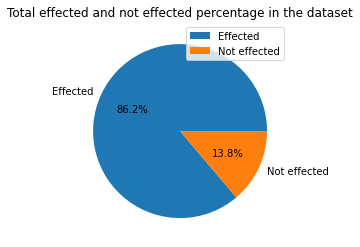

In [223]:
import matplotlib.pyplot as plt
p=data.value_counts("LUNG_CANCER").to_frame()
p=p.reset_index()
p.columns=["x","count"]
plt.pie(p["count"],labels=["Effected","Not effected"],autopct="%1.1f%%")
plt.title("Total effected and not effected percentage in the dataset")
plt.legend()

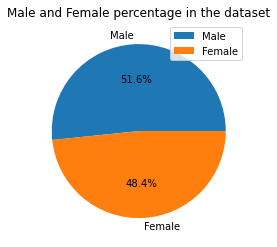

In [224]:
p=data.value_counts("GENDER").to_frame()
p=p.reset_index()
p.columns=["x","count"]
plt.pie(p["count"],labels=["Male","Female"],autopct="%1.1f%%")
plt.title("Male and Female percentage in the dataset")
plt.legend()

In [137]:
x = data.drop(["LUNG_CANCER"], axis = 1)
y=data["LUNG_CANCER"]

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [139]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Lavanya Padala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [227]:
col=data.columns
test=[]
print("Answer the questions according to the following constraints:\nYes:1\nNo:0\nAge in numeric format\nGender=>Male:1\tFemale:0")
for i in range(len(col)-1):
    print(col[i])
    t=int(input())
    if(col[i]=="AGE"):
        if(t<45 or t>90):
            print("Invalid input")
            break
    else:
        if(t<0 or t>1):
            print("Invalid input")
            break
    test.append(t)
import numpy as np
test=np.array(test)

Answer the questions according to the following constraints:
Yes:1
No:0
Age in numeric format
Gender=>Male:1	Female:0
GENDER
0
AGE
60
SMOKING
1
YELLOW_FINGERS
1
ANXIETY
1
CHRONIC DISEASE
1
FATIGUE 
1
ALLERGY 
0
WHEEZING
1
ALCOHOL CONSUMING
1
COUGHING
1
SHORTNESS OF BREATH
1
SWALLOWING DIFFICULTY
0
CHEST PAIN
1


In [228]:
solution=model.predict(np.array(test.reshape(1,-1)))
if solution==1:
    print(colored("Lung cancer","red"))
else:
    print(colored("Not lung cancer","blue"))

Lung cancer


In [144]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

89.0909090909091 %


In [145]:
from sklearn.metrics import accuracy_score

In [146]:
print("Testing data accuracy",accuracy_score(y_pred,y_test))

Testing data accuracy 0.8909090909090909


In [117]:
y_pred1= model.predict(x_train)
print("Training data accuracy",accuracy_score(y_pred1,y_train))

Training data accuracy 0.9227272727272727


In [209]:
#for age between 45 and 50
data1=data.loc[data["AGE"]>=45]
data1=data1.loc[data1["AGE"]<=50]
data1=data1[data1["SMOKING"]==1]
data1=data1[data1["LUNG_CANCER"]==1]
data1.shape

(4, 15)

In [211]:
#for age between 50 and 55
data2=data.loc[data["AGE"]>50]
data2=data2.loc[data2["AGE"]<=55]
data2=data2[data2["SMOKING"]==1]
data2=data2[data2["LUNG_CANCER"]==1]
data2.shape

(20, 15)

In [222]:
#for age between 55 and 60
data3=data.loc[data["AGE"]>55]
data3=data3.loc[data3["AGE"]<=60]
data3=data3[data3["SMOKING"]==1]
data3=data3[data3["LUNG_CANCER"]==1]
data3.shape

(26, 15)

In [212]:
#for age between 60 and 65
data4=data.loc[data["AGE"]>60]
data4=data4.loc[data4["AGE"]<=65]
data4=data4[data4["SMOKING"]==1]
data4=data4[data4["LUNG_CANCER"]==1]
data4.shape

(34, 15)

In [216]:
#for age between 65 and 70
data5=data.loc[data["AGE"]>65]
data5=data5.loc[data5["AGE"]<=70]
data5=data5[data5["SMOKING"]==1]
data5=data5[data5["LUNG_CANCER"]==1]
data5.shape

(21, 15)

In [217]:
#for age between 70 and 75
data6=data.loc[data["AGE"]>70]
data6=data6.loc[data6["AGE"]<=75]
data6=data6[data6["SMOKING"]==1]
data6=data6[data6["LUNG_CANCER"]==1]
data6.shape

(17, 15)

In [218]:
#for age between 75 and 80
data7=data.loc[data["AGE"]>75]
data7=data7.loc[data7["AGE"]<=80]
data7=data7[data7["SMOKING"]==1]
data7=data7[data7["LUNG_CANCER"]==1]
data7.shape

(8, 15)

In [219]:
#for age between 80 and 85
data8=data.loc[data["AGE"]>80]
data8=data8.loc[data8["AGE"]<=85]
data8=data8[data8["SMOKING"]==1]
data8=data8[data8["LUNG_CANCER"]==1]
data8.shape

(0, 15)

In [221]:
#for age between 85 and 90
data9=data.loc[data["AGE"]>85]
data9=data9.loc[data9["AGE"]<=90]
data9=data9[data9["SMOKING"]==1]
data9=data9[data9["LUNG_CANCER"]==1]
data9.shape

(0, 15)